rotate X0.. 
pppp [[4 4 4]
 [4 4 4]
 [4 4 4]]
afterrrr [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]
rotate X0.. 
pppp [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]
afterrrr [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]
rotate Y0..
rotate Y0..
rotate Y0..
rotate Z0..
rotate Z0..
rotate Z1..
rotate Z2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y2..
rotate Y1..
rotate X2..
rotate X2..
rotate X2..
rotate X2..
rotate X2..
rotate X1..
rotate X1..
rotate X0.. 
pppp [[1. 2. 0.]
 [3. 2. 3.]
 [5. 4. 3.]]
afterrrr [[0. 3. 3.]
 [2. 2. 4.]
 [1. 3. 5.]]
rotate X0.. 
pppp [[0. 3. 3.]
 [2. 2. 4.]
 [1. 3. 5.]]
afterrrr [[3. 4. 5.]
 [3. 2. 3.]
 [0. 2. 1.]]
rotate Y2..
rotate Y0..
rotate Z2..
rotate Y1..
rotate X1..
rotate Z1..
random..
pppp [[1. 3. 5.]
 [4. 0. 4.]
 [4. 2. 4.]]
afterrrr [[5. 4. 4.]
 [3. 0. 2.]
 [1. 4. 4.]]
random..
pppp [[1. 1. 3.]
 [4. 3. 0.]
 [0. 0. 2.]]
afterrrr [[3. 0. 2.]
 [1. 3. 0.]
 [1. 4. 0.]]
random..
pppp [[0. 0. 2.]
 [2. 2. 2.]
 

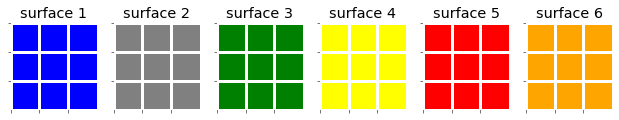

In [1]:
#ui+rubrick ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random

plt.style.use('ggplot')

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        print('pppp',surface['5'])
        surface['5'] = clockwise(surface['5'],n)
        print('afterrrr',surface['5'])

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = counter_clockwise(surface['6'],n)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = counter_clockwise(surface['4'],n)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['2'] = clockwise(surface['2'],n)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = np.flip(b)
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = np.flip(b)
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = np.flip(b)
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = clockwise(surface['3'],n)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['blue','gray','green','yellow','red','orange'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()

def BX0():
    global current_surface
    print('rotate X0.. ')
    current_surface = rotate(current_surface,'x0',3)
    updateUi_surface(current_surface)

def BX1():
    global current_surface
    print('rotate X1..')
    current_surface = rotate(current_surface,'x1',3)
    updateUi_surface(current_surface)
       
def BX2():
    global current_surface
    print('rotate X2..')
    current_surface = rotate(current_surface,'x2',3)
    updateUi_surface(current_surface)
     
def BY0():
    global current_surface
    print('rotate Y0..')
    current_surface = rotate(current_surface,'y0',3)
    updateUi_surface(current_surface)
     
def BY1():
    global current_surface
    print('rotate Y1..')
    current_surface = rotate(current_surface,'y1',3)
    updateUi_surface(current_surface)
    
def BY2():
    global current_surface
    print('rotate Y2..')
    current_surface = rotate(current_surface,'y2',3)
    updateUi_surface(current_surface)
    
def BZ0():
    global current_surface
    print('rotate Z0..')
    current_surface = rotate(current_surface,'z0',3)
    updateUi_surface(current_surface)
    
def BZ1():
    global current_surface
    print('rotate Z1..')
    current_surface = rotate(current_surface,'z1',3)
    updateUi_surface(current_surface)
    
def BZ2():
    global current_surface
    print('rotate Z2..')
    current_surface = rotate(current_surface,'z2',3)
    updateUi_surface(current_surface)
    
def BRST():
    global current_surface
    print('reset..')

    current_surface = {
        '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
        '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
        '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
        '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
        '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
        '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3)
        
    }
    
    updateUi_surface(current_surface)
    
def RANDOM():
    global current_surface
    print('random..')
#     data = {
#         '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
#         '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
#         '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
#         '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
#         '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
#         '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
#     }

    
    ran_list = ['x0','x1','x2','y0','y1','y2','z0','z1','z2']
    ran = []
    for i in range(10):
        ran.append(random.choice(ran_list))
    for i in ran:
        data = rotate(current_surface,i,3)
        
    current_surface = data
    updateUi_surface(current_surface)
    


#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubrick")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)

#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.10
BX0 = tk.Button(left_frame,text="X0",command = BX0)
BX0.place(relheight=RH, relwidth=1)
BX1 = tk.Button(left_frame,text="X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BX2 = tk.Button(left_frame,text="X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY0 = tk.Button(left_frame,text="Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY1 = tk.Button(left_frame,text="Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY2 = tk.Button(left_frame,text="Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ0 = tk.Button(left_frame,text="Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ1 = tk.Button(left_frame,text="Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ2 = tk.Button(left_frame,text="Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BRST = tk.Button(left_frame,text="Reset",command = BRST)
BRST.place(rely= 9*(0.1 + RH*0.01) ,relheight=RH, relwidth=0.5)
RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01), relx=0.5,relheight=RH, relwidth=0.5)

#----------------------------------------------------------------------------------------------------
#start

current_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

updateUi_surface(current_surface)




root.mainloop()

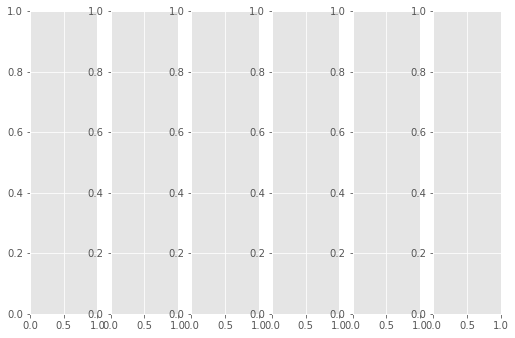

In [4]:
#ui ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors

def update(data):
       
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

#     ax[1].clf()
    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

#     ax[2].clf()
    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

#     ax[3].clf()
    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

#     ax[4].clf()
    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

#     ax[5].clf()
    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
    
    
    
    line.draw()

def B0f():
    print('btn1111111111111')
    
    update(data1)
#     x = np.linspace(0,2*np.pi,100)
#     y = np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=sin(4x)$')
#     line.draw()
    
def B1f():
    print('btn22222')
    
    update(data)
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.cos(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=cos(4x)$')
#     line.draw()
    
def B2f():
    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    figure, ax = plt.subplots(1, 6,figsize=(20,20))
    line = FigureCanvasTkAgg(figure, right_frame)
    line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
    x = np.linspace(0, 8, 1000)
    
#     cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
#     bounds = [0,1,2,3,4,5,6]
#     norm = colors.BoundaryNorm(bounds, cmap.N)

#     figure, ax = plt.subplots(1, 6,figsize=(20,20))
#     line = FigureCanvasTkAgg(figure, right_frame)
#     line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#     x = np.linspace(0, 8, 1000)

#     line.clear()
    
    
#     ax.clear()
    
#     line.get_tk_widget().pack_forget()
    
#     ax[0].clf()
#     ax[1].clf()
#     ax[2].clf()
#     ax[3].clf()
#     ax[4].clf()
#     ax[5].clf()
#     line.draw()
    line.draw()
    figure.clf()
    
#     x = np.linspace(0,2*np.pi,100)
#     y = np.exp(-0.5*x)*np.sin(4*x)
#     ax.clear()
#     ax.plot(x,y), ax.grid(True)
#     ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
#     ax.set_title('$y(x)=e^{-0.5x}sin(4x)$')
#     line.draw()

def B3f():
    x = np.linspace(0,10,100)
    y = np.exp(x)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = e^{x}$')
    line.draw()
    
def B4f():
    def gaussian(x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    x = np.linspace(0,10,100)
    y = gaussian(x,5,1.3)
    ax.clear()
    ax.plot(x,y), ax.grid(True)
    ax.set_xlabel('$x$'),ax.set_ylabel('y(x)')
    ax.set_title('$y(x) = Gaussian(x,5,1.3)$')
    line.draw()

#--- Raiz ---
root = tk.Tk()
root.geometry('940x450')
root.title("Tkinter + Matplotlib")
#------------

#-- Frames ---
left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.9)
#---------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# # ax = figure.add_subplot(111)
# # ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------
# cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
# bounds = [0,1,2,3,4,5,6]
# norm = colors.BoundaryNorm(bounds, cmap.N)

figure, ax = plt.subplots(1, 6,figsize=(20,20))
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#--- Botones ---
RH = 0.19

B0 = tk.Button(left_frame,text="SIN(4x)",command = B0f)
B0.place(relheight=RH, relwidth=1)

B1 = tk.Button(left_frame,text="COS(4x)",command = B1f)
B1.place(rely=(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B2 = tk.Button(left_frame,text="EXP(-0.5x)SIN(x)",command = B2f)
B2.place(rely= 2*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B3 = tk.Button(left_frame,text="EXP(x)",command = B3f)
B3.place(rely= 3*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)

B4 = tk.Button(left_frame,text="Gaussian(x)",command = B4f)
B4.place(rely= 4*(0.1 + RH*0.54) ,relheight=RH, relwidth=1)
#------------

#--- Agregar figura ---
# figure = plt.Figure(figsize=(5,6), dpi=100)
# ax = figure.add_subplot(111)
# ax.grid(True),ax.set_xlabel('$x$'),ax.set_ylabel('$y(x)$')
# line = FigureCanvasTkAgg(figure, right_frame)
# line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
#----------------------

data = {'1': np.array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': np.array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': np.array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': np.array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': np.array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}

data1 = {'1': np.array([[4, 1, 1],
       [0, 0, 0],
       [0, 0, 0]]), '2': np.array([[2, 2, 2],
       [0, 0, 0],
       [0, 0, 0]]), '3': np.array([[3, 3, 3],
       [0, 0, 0],
       [0, 0, 0]]), '4': np.array([[4, 4, 4],
       [0, 0, 0],
       [0, 0, 0]]), '5': np.array([[5, 5, 5],
       [0, 0, 0],
       [0, 0, 0]]), '6': np.array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}



# update(data)



root.mainloop()

In [113]:
#logic ok 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

def show_surface(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 6,figsize=(20,20))
    x = np.linspace(0, 8, 1000)

    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')

    fig.show()
    
def show_surface2line(data):

    cmap = colors.ListedColormap(['red','blue','green','yellow','black','gray'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(2, 6,figsize=(12,7))
    x = np.linspace(0, 8, 1000)

    ax[0, 0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 0].axes.xaxis.set_ticklabels([])
    ax[0, 0].axes.yaxis.set_ticklabels([])
    ax[0, 0].set_title('surface 1')

    ax[0, 1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[0, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 1].axes.xaxis.set_ticklabels([])
    ax[0, 1].axes.yaxis.set_ticklabels([])
    ax[0, 1].set_title('surface 2')

    ax[0, 2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[0, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0, 2].axes.xaxis.set_ticklabels([])
    ax[0, 2].axes.yaxis.set_ticklabels([])
    ax[0, 2].set_title('surface 3')

    ax[1, 0].imshow(data['4'], cmap=cmap, norm=norm)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 0].axes.xaxis.set_ticklabels([])
    ax[1, 0].axes.yaxis.set_ticklabels([])
    ax[1, 0].set_title('surface 4')

    ax[1, 1].imshow(data['5'], cmap=cmap, norm=norm)
    ax[1, 1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 1].axes.xaxis.set_ticklabels([])
    ax[1, 1].axes.yaxis.set_ticklabels([])
    ax[1, 1].set_title('surface 5')

    ax[1, 2].imshow(data['6'], cmap=cmap, norm=norm)
    ax[1, 2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1, 2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1, 2].axes.xaxis.set_ticklabels([])
    ax[1, 2].axes.yaxis.set_ticklabels([])
    ax[1, 2].set_title('surface 6')

    fig.show()

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis,n):
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],n)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d
        
        surface['5'] = counter_clockwise(surface['5'],n)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],n)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],n)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = clockwise(surface['6'],n)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],n)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = clockwise(surface['4'],n)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],n)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],n)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['4'] = counter_clockwise(surface['2'],n)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),n)
        surface['5'][2] = a
        surface['2'][:,0] = b
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],n)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),n)
        surface['5'][1] = a
        surface['2'][:,1] = b
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),n)
        surface['5'][0] = a
        surface['2'][:,2] = b
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = counter_clockwise(surface['3'],n)
        
    return surface
    

surface = {
    '1' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '2' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '3' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '4' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '5' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    '6' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3)
}




# show_surface(surface)
x = rotate(surface,'x1',1)
print(x)
# show_surface(x)
# x = rotate(surface,'x1',1)
# show_surface(x)



{'1': array([[1, 1, 1],
       [4, 1, 1],
       [1, 1, 1]]), '2': array([[2, 2, 2],
       [1, 2, 2],
       [2, 2, 2]]), '3': array([[3, 3, 3],
       [2, 3, 3],
       [3, 3, 3]]), '4': array([[4, 4, 4],
       [3, 4, 4],
       [4, 4, 4]]), '5': array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]]), '6': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])}
